<a href="https://colab.research.google.com/github/KoSeoAh/ML_2022/blob/main/ML_%EA%B0%90%EC%84%B1%EC%82%AC%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# bash로 명령어 입력하여 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [770 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 

In [ ]:
# 환경변수 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# Mecab 설치
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading 

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1225k      0  0:00:01  0:00:01 --:--:-- 2314k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from vega_datasets import data
import seaborn as sns
from datetime import datetime
import os
from tqdm import tqdm
import re

import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 74 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,982 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

# 데이터 전처리

In [ ]:
# 뉴스가 투자자의 감성에 어떻게 미치는지 알아보기 위해 response variable로 KOSPI 개인 투자자들의 순매수 대금 사용

trading = pd.read_csv('/content/drive/MyDrive/ML/Trading/KOSPI 거래대금 개인.csv')
trading = trading.rename(columns={'일자':'Date', '개인':'KOSPI'})
trading = trading.set_index('Date')
trading.index = pd.to_datetime(trading.index)
trading = trading.astype('float')
trading = trading.sort_index(ascending=True)
trading

,KOSPI
Date,
2018-07-02,319198.0
2018-07-03,-50848.0
2018-07-04,128592.0
2018-07-05,26508.0
2018-07-06,-112515.0
...,...
2019-09-24,-135506.0
2019-09-25,244840.0
2019-09-26,60497.0


In [ ]:
# 뉴스 데이터 날짜 & 순매수대금 날짜 일치 시키기

date_list = [i for i in trading.index.astype(str)]

path_dir = '/content/drive/MyDrive/ML/기아'
file_list = os.listdir(path_dir)

for j in file_list:
  date = j[:4]+'-'+j[4:6]+'-'+j[6:8]
  if date in date_list:
    continue
  else:
    os.remove(path_dir+'/'+j)

In [ ]:
# 뉴스 데이터 불러오기 

doc = pd.read_excel('/content/drive/MyDrive/ML/merge/merged.xlsx', engine='openpyxl')
doc = doc.drop_duplicates(['제목'])
doc

,날짜,언론사,제목,링크
0,2018.07.02,뉴시스,"기아차, 6월 국내외서 25만 1216대 판매…전년比 5.9%↑",http://www.newsis.com/view/?id=NISX20180702_00...
1,2018.07.02,동아일보,"기아차, 엇갈린 6월 판매 성적… 내수↓·해외↑",http://bizn.donga.com/car/3/all/20180702/90864...
2,2018.07.02,한국경제,"현대·기아車, 해외 판매 회복세",http://news.hankyung.com/article/2018070284181
3,2018.07.02,매일경제,현대·기아車 해외법인장 소집 권역별 각개약진 반등 노린다,http://news.mk.co.kr/newsRead.php?year=2018&no...
4,2018.07.02,EBN,"현대·기아차, 6월 나홀로 질주…한국지엠 3위 탈환 실패",http://www.ebn.co.kr/news/view/947141
...,...,...,...,...
844487,2019.09.30,이뉴스투데이,"[마감시황] 코스피, 기관 매수 힘입어 2060선 회복",http://www.enewstoday.co.kr/news/articleView.h...
844488,2019.09.30,미디어펜,[마감시황]코스피 2060선 회복…코스닥은 하락,http://www.mediapen.com/news/view/465698
844489,2019.09.30,아시아투데이,"코스피, 외인·기관 '사자'에 2060선 회복",http://www.asiatoday.co.kr/view.php?key=201909...
844490,2019.09.30,비즈니스포스트,"코스피 '기관과 외국인 매수'로 2060선 회복, 코스닥은 약보합",http://www.businesspost.co.kr/BP?command=artic...


In [ ]:
# 날짜 별로 뉴스 데이터 헤드라인 모으기

dates = doc.날짜.unique() # 날짜 리스트 생성

merge = [] #정보 저장할 리스트
for date in dates: # 날짜 하나 당
    data = doc[doc['날짜'] == date]['제목'].values.tolist() # 날짜에 해당하는 headline 정보 전부 불러온 후 list로 변경
    headlines = ' '.join(str(x) for x in data) # list 정보 하나하나 string으로 변경한 후 join을 통해 하나의 string으로 변경
    merge.append([date, headlines]) # 리스트에 저장
    
merge_df = pd.DataFrame(merge, columns = ['날짜', '제목']) # Dataframe으로 변환
merge_df = merge_df.rename(columns={'날짜':'Date', '제목':'Article'})
merge_df = merge_df.set_index('Date')
doc = merge_df

In [ ]:
doc

,Article
Date,
2018.07.02,"기아차, 6월 국내외서 25만 1216대 판매…전년比 5.9%↑ 기아차, 엇갈린 6..."
2018.07.03,[부고] 박진영 현대·기아차 홍보지원팀장 모친상 외 해외 판매 순항 중인 기아차.....
2018.07.04,"효성, 강남세브란스·기아대책과 '베트남 의료봉사' 협약 기아차 광주공장 '주민 초청..."
2018.07.05,"기아차, 렉시콘과 함께 '살롱 드 K9' 음악감상회 [단독] 검찰, 현대ㆍ기아차, ..."
2018.07.06,"'기아차 취업 미끼' 19억원 챙긴 전 노조간부 검거 기아 스팅어, 호주 고속도로 ..."
...,...
2019.09.24,현대기아차 투싼·스포티지 4만대 리콜…부품 무상교체 기아차 레드멤버스'펫 캠핑' 초...
2019.09.25,"기아차, 임직원 소장품으로 이색 바자회 개최 기아차 ""레드멤버스 'RED 펫 캠핑'..."
2019.09.26,"기아차, 전국 초등학교에 교통안전 반사카드 등 배포 9월 26일 기아차 정보 -0...."


In [ ]:
doc.to_csv('/content/drive/MyDrive/ML/News.csv')

# 감성사전 구축

In [ ]:
# 형태소 분석 - 명사만 추출

mecab = Mecab()

content = np.array(doc.Article)
news = np.array([' '.join(mecab.nouns(sent)) for sent in content])
cont = np.array([re.sub('[^a-zA-Zㄱ-ㅣ가-힣]', ' ', dat) for dat in news])

In [ ]:
# 감성사전 구축을 위해 단어별로 TF-IDF 값 학습
# 단어들의 중요도를 타나내는 TF-IDF 행렬 도출

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=200) # 단어의 차원 수 조절
tfidf_vectorizer.fit(cont)
col = sorted(tfidf_vectorizer.vocabulary_.items())
word = [w[0] for w in col]
text = pd.DataFrame(tfidf_vectorizer.transform(news).toarray(), columns=word)
text.index = doc.index

In [ ]:
text.index = pd.to_datetime(text.index)
text

,가격,가능,가속,가치,갈등,감독,감소,강세,강화,개발,...,협력,협상,화학,확대,확보,환율,회계,회복,회장,효과
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-02,0.050567,0.043927,0.007141,0.041456,0.026003,0.125288,0.024301,0.005959,0.042968,0.059396,...,0.019549,0.018846,0.023758,0.041203,0.016662,0.006649,0.007894,0.016746,0.033243,0.037049
2018-07-03,0.023722,0.057453,0.024496,0.013513,0.009357,0.044913,0.005771,0.020442,0.056691,0.186514,...,0.029231,0.016577,0.028212,0.028170,0.022611,0.014035,0.010935,0.030933,0.129828,0.017253
2018-07-04,0.021317,0.041500,0.004926,0.108501,0.014676,0.034244,0.007544,0.022609,0.040226,0.086043,...,0.042703,0.013000,0.157745,0.021317,0.110831,0.013759,0.030629,0.015403,0.174281,0.015785
2018-07-05,0.020826,0.050061,0.015125,0.013559,0.011266,0.061963,0.009651,0.004733,0.065008,0.029880,...,0.043132,0.009979,0.022016,0.060992,0.026469,0.005281,0.054861,0.008868,0.079214,0.013848
2018-07-06,0.017800,0.024635,0.000000,0.023177,0.009629,0.038515,0.052792,0.010788,0.026391,0.013441,...,0.011796,0.004265,0.014785,0.029243,0.009695,0.006018,0.017416,0.046737,0.034604,0.002959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,0.006689,0.006821,0.008501,0.004355,0.004221,0.130864,0.000000,0.014189,0.007308,0.045963,...,0.003879,0.014957,0.003536,0.003344,0.008501,0.011873,0.010572,0.079746,0.007915,0.000000
2019-09-25,0.018592,0.006320,0.000000,0.000000,0.007822,0.007822,0.008041,0.013146,0.006771,0.026206,...,0.014375,0.013858,0.032757,0.018592,0.015753,0.007333,0.169780,0.006157,0.007333,0.014423
2019-09-26,0.035802,0.027382,0.000000,0.000000,0.022594,0.045189,0.011614,0.018986,0.009778,0.018924,...,0.031141,0.090065,0.009462,0.053703,0.000000,0.031774,0.132032,0.088923,0.010591,0.010415


'갈등'이라는 단어가 7/2에는 0.026003이고 7/4에는 0.009357이므로 7/2 뉴스 기사에서 더 중요한 단어임

In [ ]:
# KOSPI 순매수 데이터 추가하여 최종 데이터셋 완성

df = pd.concat([trading, text], axis=1)
df

,KOSPI,가격,가능,가속,가치,갈등,감독,감소,강세,강화,...,협력,협상,화학,확대,확보,환율,회계,회복,회장,효과
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-02,319198.0,0.050567,0.043927,0.007141,0.041456,0.026003,0.125288,0.024301,0.005959,0.042968,...,0.019549,0.018846,0.023758,0.041203,0.016662,0.006649,0.007894,0.016746,0.033243,0.037049
2018-07-03,-50848.0,0.023722,0.057453,0.024496,0.013513,0.009357,0.044913,0.005771,0.020442,0.056691,...,0.029231,0.016577,0.028212,0.028170,0.022611,0.014035,0.010935,0.030933,0.129828,0.017253
2018-07-04,128592.0,0.021317,0.041500,0.004926,0.108501,0.014676,0.034244,0.007544,0.022609,0.040226,...,0.042703,0.013000,0.157745,0.021317,0.110831,0.013759,0.030629,0.015403,0.174281,0.015785
2018-07-05,26508.0,0.020826,0.050061,0.015125,0.013559,0.011266,0.061963,0.009651,0.004733,0.065008,...,0.043132,0.009979,0.022016,0.060992,0.026469,0.005281,0.054861,0.008868,0.079214,0.013848
2018-07-06,-112515.0,0.017800,0.024635,0.000000,0.023177,0.009629,0.038515,0.052792,0.010788,0.026391,...,0.011796,0.004265,0.014785,0.029243,0.009695,0.006018,0.017416,0.046737,0.034604,0.002959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,-135506.0,0.006689,0.006821,0.008501,0.004355,0.004221,0.130864,0.000000,0.014189,0.007308,...,0.003879,0.014957,0.003536,0.003344,0.008501,0.011873,0.010572,0.079746,0.007915,0.000000
2019-09-25,244840.0,0.018592,0.006320,0.000000,0.000000,0.007822,0.007822,0.008041,0.013146,0.006771,...,0.014375,0.013858,0.032757,0.018592,0.015753,0.007333,0.169780,0.006157,0.007333,0.014423
2019-09-26,60497.0,0.035802,0.027382,0.000000,0.000000,0.022594,0.045189,0.011614,0.018986,0.009778,...,0.031141,0.090065,0.009462,0.053703,0.000000,0.031774,0.132032,0.088923,0.010591,0.010415


# Ridge Regression

개인투자자의 순매수대금에 미치는 영향력 회귀 계수로 파악

## Preprocessing

In [ ]:
X = df.drop(columns=['KOSPI'])
y = df['KOSPI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.head()

,가격,가능,가속,가치,갈등,감독,감소,강세,강화,개발,...,협력,협상,화학,확대,확보,환율,회계,회복,회장,효과
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-03,0.008309,0.016947,0.005280,0.005410,0.005244,0.036708,0.016173,0.008813,0.004539,0.026352,...,0.106005,0.023226,0.000000,0.008309,0.010560,0.000000,0.004378,0.024766,0.014749,0.009669
2019-06-27,0.024256,0.016490,0.010276,0.000000,0.000000,0.000000,0.000000,0.008575,0.097164,0.017095,...,0.046885,0.018080,0.017095,0.016171,0.000000,0.009568,0.000000,0.088361,0.009568,0.000000
2019-04-29,0.010256,0.020917,0.000000,0.006677,0.000000,0.006473,0.019961,0.054388,0.005602,0.000000,...,0.005947,0.005733,0.016263,0.035896,0.013034,0.024272,0.270161,0.086609,0.000000,0.005967
2019-05-24,0.003200,0.003263,0.000000,0.000000,0.008078,0.028273,0.000000,0.000000,0.000000,0.006766,...,0.000000,0.000000,0.000000,0.012800,0.004067,0.000000,0.131496,0.000000,0.003787,0.003724
2019-08-08,0.010507,0.010714,0.000000,0.006840,0.006631,0.013262,0.013633,0.000000,0.000000,0.005554,...,0.000000,0.005874,0.005554,0.005253,0.013353,0.012433,0.000000,0.046973,0.006216,0.018339


In [ ]:
# 같은 스케일로 맞추기 위해 standardizing

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Z_train = ss.fit_transform(X_train) # Fit 
Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index) # Transform the df

In [ ]:
Z_train.head()

,가격,가능,가속,가치,갈등,감독,감소,강세,강화,개발,...,협력,협상,화학,확대,확보,환율,회계,회복,회장,효과
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-03,-0.633187,-0.205245,-0.268507,-0.313143,-0.237717,0.495774,-0.017649,-0.448566,-0.676674,-0.129096,...,2.083390,0.013222,-0.523810,-0.598024,0.031970,-0.675935,-0.592092,-0.271549,-0.181352,-0.186475
2019-06-27,0.166466,-0.227125,0.242956,-0.455187,-0.458500,-0.498435,-0.576449,-0.458816,2.506109,-0.264023,...,0.601335,-0.142760,-0.134720,-0.341971,-0.679932,-0.084400,-0.644133,1.146241,-0.295891,-0.738212
2019-04-29,-0.535572,-0.015095,-0.809116,-0.279867,-0.458500,-0.323131,0.113261,1.517692,-0.640135,-0.513170,...,-0.424924,-0.516992,-0.153649,0.300505,0.198749,0.824749,2.567530,1.107193,-0.507390,-0.397715
2019-05-24,-0.889400,-0.860620,-0.809116,-0.455187,-0.118404,0.267309,-0.576449,-0.828787,-0.832639,-0.414565,...,-0.574013,-0.690777,-0.523810,-0.451765,-0.405777,-0.675935,0.919086,-0.823686,-0.423685,-0.525737
2019-08-08,-0.522998,-0.503754,-0.809116,-0.275580,-0.179331,-0.139256,-0.105400,-0.828787,-0.832639,-0.432230,...,-0.574013,-0.512743,-0.397406,-0.697561,0.220231,0.092751,-0.644133,0.223536,-0.369971,0.308253


## Modeling

In [ ]:
from sklearn.linear_model import Ridge

Ridge의 회귀계수에 대한 영향 시각화

In [ ]:
def ridge_coefs(X, y, alphas):
    
    coefs = [] # List of coefficients:
    ridge_reg = Ridge() # Initiate the model
    
    for a in alphas: # Iterate through the alphas fed into the function:
        ridge_reg.set_params(alpha=a) # Reinitiate with the new alpha:
        ridge_reg.fit(X, y) # Refit the model on the provided X, y
        coefs.append(ridge_reg.coef_) # Print the coefficient list
        
    return coefs

In [ ]:
r_alphas = np.logspace(0, 5, 200) # 로그 공간의 난수 생성. 베이스는 10.
r_coefs = ridge_coefs(Z_train, y_train, r_alphas) # Ridge에 대해 각 알파의 계수 저장

In [ ]:
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]

    colors = sns.color_palette("husl", len(coefs[0]))
    fig = plt.figure()
    fig.set_size_inches(18,5)

    ax1 = fig.add_subplot(121)
    ax1.set_prop_cycle(cycler('color', colors))
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    ax1.plot(alphas, coefs, lw=2)
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    
    ax1.set_xlim([amin, amax]) # Enforce the axis limits
    ax1.set_title(regtype+' coefficients\n', fontsize=20) # Put a title on the axis
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the second chart:
    ymin, ymax = ax1.get_ylim()

    ax2 = fig.add_subplot(122)
    ax2.bar(list(range(1, len(feature_names)+1)), coefs[-1], align='center', color=colors)
    ax2.set_xticks(list(range(1, len(feature_names)+1)))
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefficients\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [ ]:
from ipywidgets import *
from IPython.display import display

def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.1,5,0.2))
print("this snippet is taken from an online source") # (좌) Regularization path, (우) 알파에 따른 계수

interactive(children=(FloatSlider(value=0.1, description='log_of_alpha', max=5.0, min=0.1, step=0.2), Output()…

this snippet is taken from an online source



*   알파(regularization coefficient의 strength)와 계수 사이의 관계를 볼 수 있음.
*   최적의 알파값을 찾는 것은 cross-validation을 통해서 가장 큰 알파값을 가진 모델을 선택.



In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV

In [ ]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100) # Generates 200 values equally between 0 and 5, then converts them to alphas between 10^0 and 10^5.

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2') # Ridge-alphas에 대한 cross-validation

ridge_model = ridge_model.fit(Z_train, y_train)

In [ ]:
# 최적의 알파값
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

475.0810162102798

In [ ]:
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [ ]:
ridge_opt = Ridge(alpha=ridge_optimal_alpha)
ridge_opt.fit(Z_train, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(Z_test)
ridge_opt_preds_train = ridge_opt.predict(Z_train)

# Evaluate model
print(r2_score(y_test, ridge_opt_preds))
print(r2_score(y_train, ridge_opt_preds_train))

0.15043168889764602
0.5844375167155441




*   높지 않은 $R^2$ 값을 보임. 
*   시계열 데이터 전처리(trend, seasonality, noise 제거)를 하지 않았기 때문인지, 선형회귀모형의 assumptions이 violated가 되었는지, 혹은 다른 이유 때문인지 추가적인 확인이 필요함.
* 다만, 전체 데이터로 구축한 모델이 아니기에 추후 전체 데이터로 다시 fitting 하면 더 높은 $R^2$ 값을 보일 수 있을 거라 예측.



# 최종 감성점수 도출

In [ ]:
coeff = pd.Series(data=ridge_opt.coef_, index=X.columns)
coeff_df = pd.DataFrame(coeff)
coeff_df.columns = ['감성점수']
coeff_df

,감성점수
가격,-1238.452072
가능,2543.237580
가속,-41.214470
가치,1480.306139
갈등,2065.165741
...,...
환율,1030.112060
회계,-540.260706
회복,-12255.042983
회장,-3112.153803


In [ ]:
coeff_df.sort_values('감성점수', ascending=False)

,감성점수
팔자,16051.578542
매도,13439.786078
문화,13071.696282
우려,10990.274873
타이거즈,9502.336050
...,...
돌파,-9039.652608
모델,-9509.364686
상승,-11540.601551
매수,-12111.719319


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

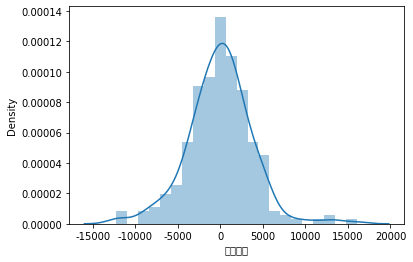

In [ ]:
sns.distplot(coeff_df['감성점수'])

In [ ]:
coeff_df.to_csv('/content/drive/MyDrive/ML/Sentiment Dictionary.csv')